In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import time

import os
import sys

path_ = os.path.abspath(os.path.join('..', '00_utils'))
if path_ not in sys.path:
    sys.path.append(path_)
    
import analyse_results
reload_module = analyse_results.reload_module

Graphs_training = reload_module('analyse_results', 'Graphs_training')
Results = reload_module('analyse_results', 'Results')

train_info = Graphs_training()

### Load Pyomo results in

In [2]:
fn = 'results/2024-08-21_09-45-20_training_convergence.pkl' # 16 neurons
fn = 'results/pyomo_training_convergence_vdp_new.pkl' # 32 neurons

pyomo = Results.load_results(fn)
pyomo_df = Results.collect_data_toy(pyomo)

map_vdp = (pyomo_df.param1 == 'vdp') & (pyomo_df.param2 == True)
pyomo_df = pyomo_df[map_vdp].groupby(['param1', 'param2']).agg(list).reset_index()
pyomo_df.drop(columns=['param2'], inplace=True)
pyomo_df['time_elapsed'] = pyomo_df.time_elapsed.item()[-1]
pyomo_df_32 = pyomo_df.copy()

pyomo_df_32.rename(columns={'mse_train': 'training_loss', 'mse_test':'testing_loss'}, inplace=True)
pyomo_df_32 = Graphs_training.prepare_timings_general(pyomo_df_32)
pyomo_df_32['type'] = 'pyomo'
pyomo_df_32

,param1,param3,time_elapsed,training_loss,testing_loss,termination,times,type
0,vdp,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",7.831207,"[3958.8835, 5292.731, 2.5529947, 0.10097199, 0...","[3039.8967, 3501.3352, 3.4177668, 1.0562081, 1...","[maxIterations, maxIterations, maxIterations, ...","[0.0, 0.11029869066157812, 0.22059738132315623...",pyomo


### Load Pytorch results in

In [3]:
fn = 'results/pytorch_training_conv_vdp_new.pkl'
fn_time = 'results/pytorch_training_conv_vdp_time_new.pkl'

pt = {True:Results.load_results(fn)}
pt_time = {True:Results.load_results(fn_time)}

pt_df = Results.collect_data_toy(pt)
pt_time_df = Results.collect_data_toy(pt_time)

pt_df['time_elapsed'] = pt_time_df['time_elapsed']
pt_df.rename(columns={'param1': 'pretraining', 'train_loss':'training_loss'}, inplace=True)
#display(pt_df)

pt_df = Graphs_training.extract_training_loss(pt_df)
pt_df = Graphs_training.split_train_test_losses(pt_df)
pt_df['pyomo_pretraining'] = False
pt_df['type'] = 'pt'
train_info.set_pretraining_time(pt_time_df['time_elapsed'].item()[0], 'pt_regular')
pt_df_regular = pt_df.copy()

pt_df_regular

,pretraining,time_elapsed,mse_train,mse_test,training_loss,testing_loss,pyomo_pretraining,type
0,True,"[2.2213919162750244, 25.136736154556274]",0.414818,1.669181,"[6.9064636, 4.654627, 3.2642736, 2.856881, 2.7...","[7.0571465, 5.3037148, 3.6100237, 2.9633956, 2...",False,pt


### Load Pytorch results in with Pyomo pretraining

In [4]:
fn = 'results/pytorch_training_conv_vdp_pyomo_new.pkl'
fn_time = 'results/pytorch_training_conv_vdp_time_pyomo_new.pkl'

pt = {False:Results.load_results(fn)}
pt_time = {False:Results.load_results(fn_time)}

pt_df = Results.collect_data_toy(pt)
pt_time_df = Results.collect_data_toy(pt_time)

pt_df['time_elapsed'] = pt_time_df['time_elapsed']
pt_df.rename(columns={'param1': 'pretraining', 'train_loss':'training_loss'}, inplace=True)
#display(pt_df)

pt_df = Graphs_training.extract_training_loss(pt_df)
pt_df = Graphs_training.split_train_test_losses(pt_df)
pt_df['pyomo_pretraining'] = True
pt_df['type'] = 'pt'

pt_df_pyomo = pt_df.copy()
pt_df_pyomo

,pretraining,time_elapsed,mse_train,mse_test,training_loss,testing_loss,pyomo_pretraining,type
0,False,28.587913,0.010653,0.429014,"[0.023530617, 0.013944504, 0.0141275115, 0.012...","[0.60685587, 0.44819725, 0.43189102, 0.4478165...",True,pt


### Load diffrax-jax results in

In [5]:
fn = 'results/jax_training_conv_vdp_new.pkl'
fn_time = 'results/jax_training_conv_vdp_time_new.pkl'

jd = Results.load_results(fn)
jd_time = Results.load_results(fn_time)

jd_df = Results.collect_data_toy(jd)
jd_time_df = Results.collect_data_toy(jd_time)

jd_df['time_elapsed'] = jd_time_df['time_elapsed']
jd_df.rename(columns={'param2': 'pretraining'}, inplace=True)

jd_df[jd_df.pretraining]['time_elapsed'].item()[0]

2.1977128982543945

In [6]:
fn = 'results/jax_training_conv_vdp_new.pkl'
fn_time = 'results/jax_training_conv_vdp_time_new.pkl'

jd = Results.load_results(fn)
jd_time = Results.load_results(fn_time)

jd_df = Results.collect_data_toy(jd)
jd_time_df = Results.collect_data_toy(jd_time)

jd_df['time_elapsed'] = jd_time_df['time_elapsed']
jd_df.rename(columns={'param2': 'pretraining'}, inplace=True)

time_elpased_pretraining = jd_df[jd_df.pretraining]['time_elapsed'].item()[0]
train_info.set_pretraining_time(time_elpased_pretraining, 'regular')

jd_df = Graphs_training.extract_training_loss(jd_df)
jd_df = Graphs_training.split_train_test_losses(jd_df)
jd_df['type'] = 'jd'
jd_df

,param1,pretraining,time_elapsed,mse_train,mse_test,training_loss,testing_loss,type
0,vdp,False,27.608754,2.71894,129.82791,"[3.0707103809818044, 3.0087893246728203, 2.956...","[3.515085930195885, 3.78126595661457, 3.791016...",jd
1,vdp,True,"[2.1977128982543945, 23.853419065475464]",0.031242114,1.0998203,"[0.4517634809405155, 0.42516003085293347, 0.41...","[2.1259528641801833, 1.8652082721399617, 1.732...",jd


### Load diffrax-jax with pyomo pretraining

In [7]:
fn_pyomo = 'results/diffrax_pyomo_pretraining_32_pyomo.pkl'
fn_pyomo_time = 'results/diffrax_pyomo_pretraining_time_32_pyomo.pkl'

jd_pyomo = Results.load_results(fn_pyomo)
jd_pyomo_time = Results.load_results(fn_pyomo_time)

jd_df_pyomo = Results.collect_data_toy(jd_pyomo)
jd_time_df_pyomo = Results.collect_data_toy(jd_pyomo_time)
jd_df_pyomo.time_elapsed = jd_time_df_pyomo.time_elapsed
jd_df_pyomo['pretraining'] = False
jd_df_pyomo['param1'] = 'vdp'
jd_df_pyomo['type'] = 'jd'

In [8]:
jd_df_pyomo = Graphs_training.extract_training_loss(jd_df_pyomo)
jd_df_pyomo = Graphs_training.split_train_test_losses(jd_df_pyomo)
display(jd_df_pyomo)

with open("../00_trained_wb/trained_wb_32.pkl", "rb") as f:
    custom_params = pickle.load(f)

jd_df['pyomo_pretraining'] = False
jd_df_pyomo['pyomo_pretraining'] = True

,param1,time_elapsed,mse_train,mse_test,training_loss,pretraining,type,testing_loss
0,vdp,15.562431,0.0105488105,0.5825034,"[0.03502465860488416, 0.10385652244967507, 0.0...",False,jd,"[0.6546963510078316, 0.5959212081134444, 0.596..."


### Combine

In [9]:
# concatenate the dataframes
df = pd.concat([jd_df, jd_df_pyomo, pt_df_regular, pt_df_pyomo], ignore_index=True)
df

,param1,pretraining,time_elapsed,mse_train,mse_test,training_loss,testing_loss,type,pyomo_pretraining
0,vdp,False,27.608754,2.71894,129.82791,"[3.0707103809818044, 3.0087893246728203, 2.956...","[3.515085930195885, 3.78126595661457, 3.791016...",jd,False
1,vdp,True,"[2.1977128982543945, 23.853419065475464]",0.031242114,1.0998203,"[0.4517634809405155, 0.42516003085293347, 0.41...","[2.1259528641801833, 1.8652082721399617, 1.732...",jd,False
2,vdp,False,15.562431,0.0105488105,0.5825034,"[0.03502465860488416, 0.10385652244967507, 0.0...","[0.6546963510078316, 0.5959212081134444, 0.596...",jd,True
3,NaN,True,"[2.2213919162750244, 25.136736154556274]",0.414818,1.669181,"[6.9064636, 4.654627, 3.2642736, 2.856881, 2.7...","[7.0571465, 5.3037148, 3.6100237, 2.9633956, 2...",pt,False
4,NaN,False,28.587913,0.010653,0.429014,"[0.023530617, 0.013944504, 0.0141275115, 0.012...","[0.60685587, 0.44819725, 0.43189102, 0.4478165...",pt,True


### Save pretraining times

In [10]:
df.loc[df.pretraining, 'time_elapsed'] = df.loc[df.pretraining].time_elapsed.apply(lambda x: x[1])
train_info.set_pretraining_time(custom_params['time_elapsed'], 'pyomo')
train_info.set_pretraining_time(custom_params['time_elapsed'], 'pt_pyomo')

In [11]:
train_info.prepare_timings(df)
df

,param1,pretraining,time_elapsed,mse_train,mse_test,training_loss,testing_loss,type,pyomo_pretraining,times
0,vdp,False,27.608754,2.71894,129.82791,"[3.0707103809818044, 3.0087893246728203, 2.956...","[3.515085930195885, 3.78126595661457, 3.791016...",jd,False,"[0.0, 0.1380437707901001, 0.2760875415802002, ..."
1,vdp,True,23.853419,0.031242114,1.0998203,"[0.4517634809405155, 0.42516003085293347, 0.41...","[2.1259528641801833, 1.8652082721399617, 1.732...",jd,False,"[2.1977128982543945, 2.277224295139313, 2.3567..."
2,vdp,False,15.562431,0.0105488105,0.5825034,"[0.03502465860488416, 0.10385652244967507, 0.0...","[0.6546963510078316, 0.5959212081134444, 0.596...",jd,True,"[7.964180946350098, 8.041993101835251, 8.11980..."
3,NaN,True,25.136736,0.414818,1.669181,"[6.9064636, 4.654627, 3.2642736, 2.856881, 2.7...","[7.0571465, 5.3037148, 3.6100237, 2.9633956, 2...",pt,False,"[2.2213919162750244, 2.3889701573053994, 2.556..."
4,NaN,False,28.587913,0.010653,0.429014,"[0.023530617, 0.013944504, 0.0141275115, 0.012...","[0.60685587, 0.44819725, 0.43189102, 0.4478165...",pt,True,"[7.964180946350098, 9.393576598167419, 10.8229..."


In [12]:
print(pyomo_df_32.training_loss.item()[-1])
print(pyomo_df_32.testing_loss.item()[-1])
print(pyomo_df_32.time_elapsed.item())

0.022520142
0.6139431
7.831207036972046


In [13]:
n = 4
print(df.iloc[n].training_loss[-1])
print(df.iloc[n].testing_loss[-1])
print(df.iloc[n].time_elapsed)

0.011070795
0.4203783
28.587913036346436


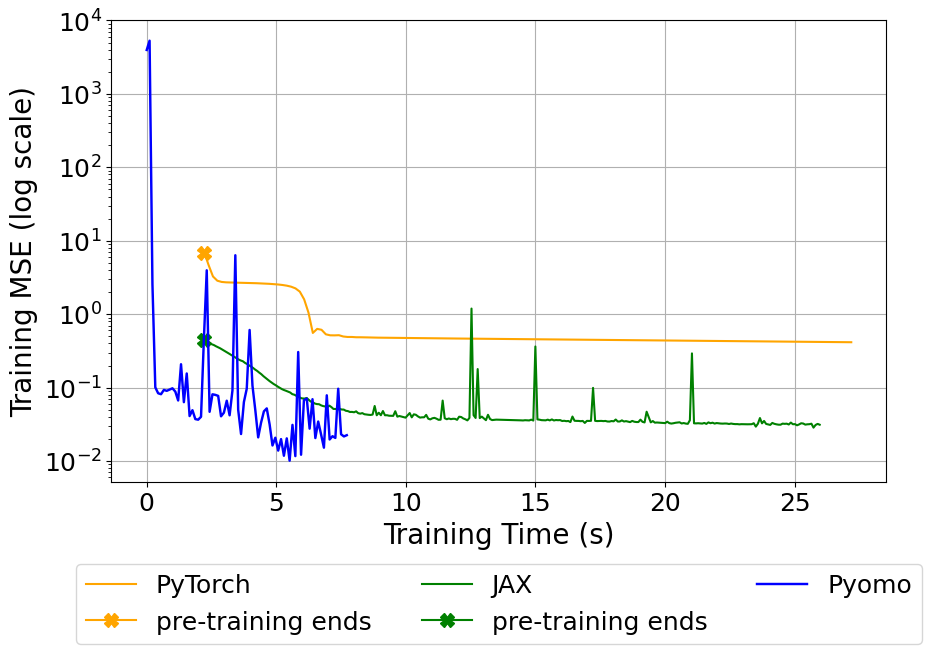

In [40]:
lw = 1.75
plt.figure(figsize=(10, 6))

plt.plot(df.iloc[3].times, df.iloc[3].training_loss, label='PyTorch', color='orange')
plt.plot(df.iloc[3].times[0], df.iloc[3].training_loss[0], marker = 'X', markersize = 10, label='pre-training ends', color='orange')
plt.plot(df.iloc[1].times, df.iloc[1].training_loss, label='JAX', color='green')
plt.plot(df.iloc[1].times[0], df.iloc[1].training_loss[0], marker = 'X', markersize = 10, label='pre-training ends', color='green')
plt.plot(pyomo_df_32.times.item(), pyomo_df_32.training_loss.item(), label='Pyomo', color='blue', linewidth=lw)

# plt.title('MSE loss during training (Train set) for 3 different models for the Van der Pol Oscillator')
plt.xlabel("Training Time (s)", fontsize=20)
plt.ylabel('Training MSE (log scale)', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.yscale('log')
plt.legend()
plt.grid(True)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=False, ncol=3, fontsize=18)
plt.show()

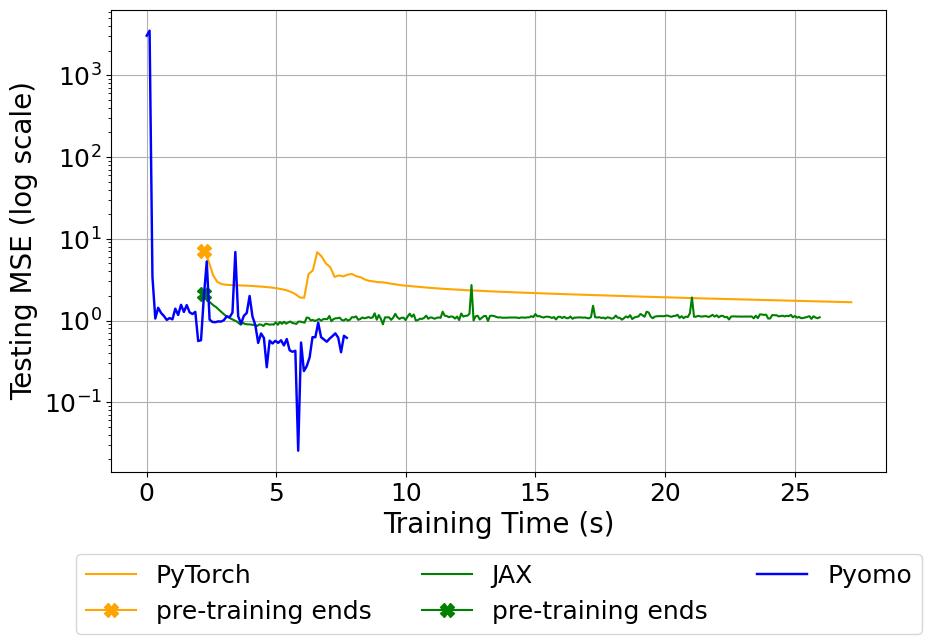

In [48]:
plt.figure(figsize=(10, 6))

plt.plot(df.iloc[3].times, df.iloc[3].testing_loss, label='PyTorch', color='orange')
plt.plot(df.iloc[3].times[0], df.iloc[3].testing_loss[0], marker = 'X', markersize = 10, label='pre-training ends', color='orange')
plt.plot(df.iloc[1].times, df.iloc[1].testing_loss, label='JAX', color='green')
plt.plot(df.iloc[1].times[0], df.iloc[1].testing_loss[0], marker = 'X', markersize = 10, label='pre-training ends', color='green')
plt.plot(pyomo_df_32.times.item(), pyomo_df_32.testing_loss.item(), label='Pyomo', color='blue', linewidth=1.75)

#plt.title('MSE loss during training (Test set) for 3 different models for the Van der Pol Oscillator')
plt.xlabel("Training Time (s)", fontsize=20)
plt.ylabel('Testing MSE (log scale)', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.yscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=False, ncol=3, fontsize=18)
plt.grid(True)
plt.show()

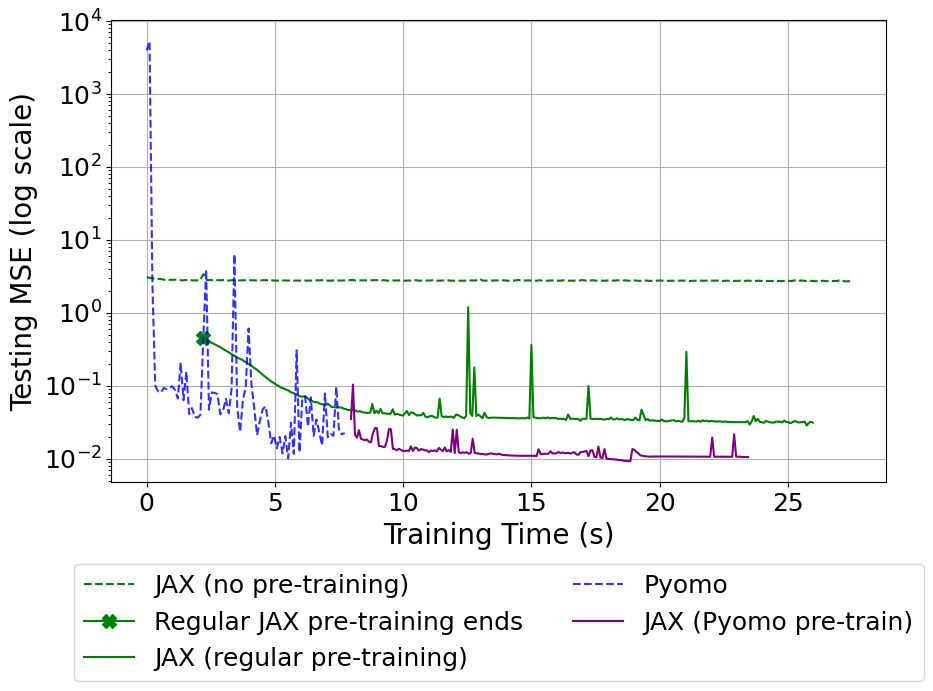

In [74]:
plt.figure(figsize=(10, 6))

plt.plot(df.iloc[0].times, df.iloc[0].training_loss, label='JAX (no pre-training)', color='green', ls = '--')
plt.plot(df.iloc[1].times[0], df.iloc[1].training_loss[0], marker = 'X', markersize = 10, label='Regular JAX pre-training ends', color='green')
plt.plot(df.iloc[1].times, df.iloc[1].training_loss, label='JAX (regular pre-training)', color='green')
plt.plot(pyomo_df_32.times.item(), pyomo_df_32.training_loss.item(), label='Pyomo', color='blue', ls ='--', alpha=0.8)
plt.plot(df.iloc[2].times, df.iloc[2].training_loss, label='JAX (Pyomo pre-train)', color='purple')

#plt.title('MSE loss during training (Train set) for 2 initialization methods for the Van der Pol Oscillator')
plt.xlabel("Training Time (s)", fontsize=20)
plt.ylabel('Testing MSE (log scale)', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.yscale('log')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=False, ncol=2, fontsize=18)
plt.grid(True)
plt.show()

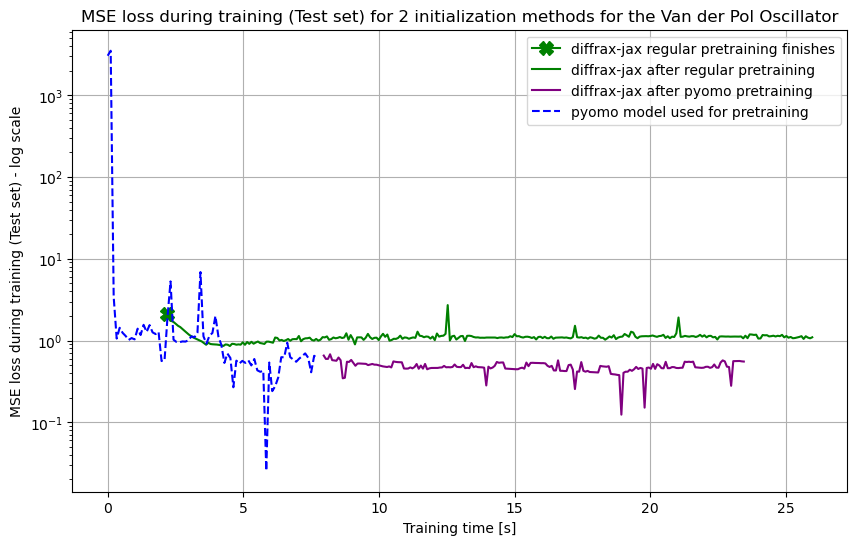

In [65]:
plt.figure(figsize=(10, 6))

plt.plot(df.iloc[1].times[0], df.iloc[1].testing_loss[0], label='diffrax-jax regular pretraining finishes', color='green', marker = 'X', markersize = 10, )
plt.plot(df.iloc[1].times, df.iloc[1].testing_loss, label='diffrax-jax after regular pretraining', color='green')
plt.plot(df.iloc[2].times, df.iloc[2].testing_loss, label='diffrax-jax after pyomo pretraining', color='purple')
plt.plot(pyomo_df_32.times.item(), pyomo_df_32.testing_loss.item(), label='pyomo model used for pretraining', color='blue', ls ='--')

plt.title('MSE loss during training (Test set) for 2 initialization methods for the Van der Pol Oscillator')
plt.xlabel('Training time [s]')
plt.ylabel('MSE loss during training (Test set) - log scale')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

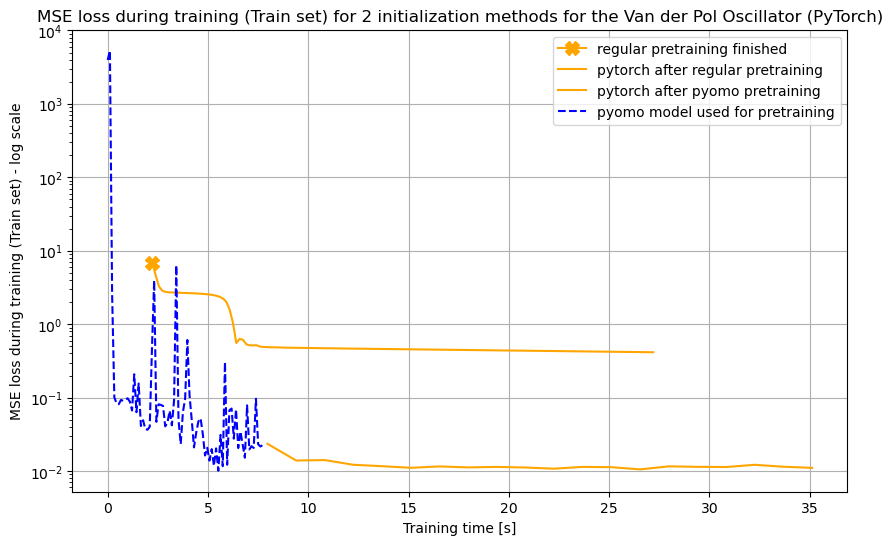

In [18]:
plt.figure(figsize=(10, 6))

plt.plot(df.iloc[3].times[0], df.iloc[3].training_loss[0], label='regular pretraining finished', color='orange', marker = 'X', markersize = 10)
plt.plot(df.iloc[3].times, df.iloc[3].training_loss, label='pytorch after regular pretraining', color='orange')
plt.plot(df.iloc[4].times, df.iloc[4].training_loss, label='pytorch after pyomo pretraining', color='orange')
plt.plot(pyomo_df_32.times.item(), pyomo_df_32.training_loss.item(), label='pyomo model used for pretraining', color='blue', ls ='--')

plt.title('MSE loss during training (Train set) for 2 initialization methods for the Van der Pol Oscillator (PyTorch)')
plt.xlabel('Training time [s]')
plt.ylabel('MSE loss during training (Train set) - log scale')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

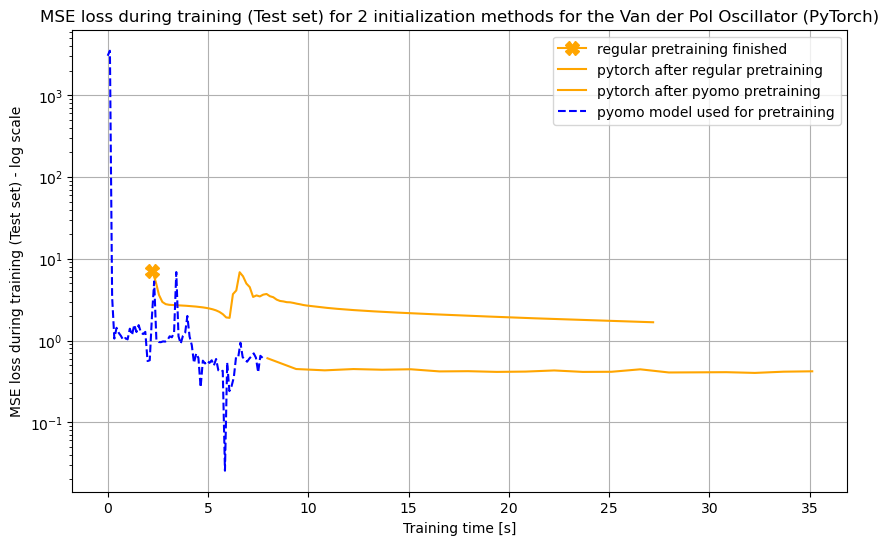

In [19]:
plt.figure(figsize=(10, 6))

plt.plot(df.iloc[3].times[0], df.iloc[3].testing_loss[0], label='regular pretraining finished', color='orange', marker = 'X', markersize = 10)
plt.plot(df.iloc[3].times, df.iloc[3].testing_loss, label='pytorch after regular pretraining', color='orange')
plt.plot(df.iloc[4].times, df.iloc[4].testing_loss, label='pytorch after pyomo pretraining', color='orange')
plt.plot(pyomo_df_32.times.item(), pyomo_df_32.testing_loss.item(), label='pyomo model used for pretraining', color='blue', ls ='--')

plt.title('MSE loss during training (Test set) for 2 initialization methods for the Van der Pol Oscillator (PyTorch)')
plt.xlabel('Training time [s]')
plt.ylabel('MSE loss during training (Test set) - log scale')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()